## Optimization via Gradient Descent
  
We should mention that all the functions are **differentiable** so we can calculate their gradient.  
  
GD is an iterative method that for a given initial state and step size finds the value that minimizes the given function.
  
1) initial step: as  GD is iterative method so it needs to specify an initial step to start the iteration. it should notice that according to initial step, GD may converge to different minimums (locals or global).  
  
2) step size (or alpha): aplpha is a critical parameter in GD. small alpha may take so long to converge. and big alpha may result in oscilation over the minima. alpha is limited in the interval [0,1].  
  
**Note:** instead of using fixed value for alpha we can use backtracking or heuristic algorithms which computes an alpha that gaurantee the convergance at that specific iteration (this is not necessarly the best alpha).  
  
3) descent direction (or P): another key parameter of GD is Pk which is the descent direction of the given function. In order to always obtain decsent direction, we consider P = grad(f).

In [11]:
import numpy as np

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

In [12]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, back_tracked = False, alpha = 0.001):
    # Initialization
    k = 0
    
    x = np.empty((n, kmax ))
    f_val = np.empty((kmax,1))
    grads = np.empty((n, kmax))
    err = np.empty((kmax,1))
    
    # Assign the values for the first iteration
    f_val[k] = f(x0)
    grads[:,k] = grad_f(x0).ravel()
    err[k] = np.linalg.norm(grad_f(x0))
    x[:,k] = x0.ravel()
    
    # Choose step size
    if not back_tracked:    
        alpha = alpha
    else:
        alpha =backtracking(f, grad_f, x[:,0])
    
    # Handle the condition for the first iteration
    x[:,k+1] = x[:,k] - alpha * grads[:,k]
        
    # Update the step size alpha
    if back_tracked:    
        alpha = backtracking(f, grad_f, x[:,k+1])
    
    # Update the values the the actual iteration
    k = k+1
    f_val[k] = f(x[:,k])
    grads[:,k] = grad_f(x[:,k])
    err[k] = np.linalg.norm(grad_f(x[:,k]))
    
    # Start the iterations
    while (k < kmax-1) and (err[k] > tolf * err[0]) and (np.linalg.norm(x[:,k] - x[:,k-1]) > tolx) :
        # Update the value of x
        x[:,k+1] = x[:,k] - alpha * grads[:,k]
        
        # Update the step size alpha
        if back_tracked:
            alpha = backtracking(f, grad_f, x[:,k+1])
        
        # Update the values the the actual iteration
        k = k+1
        f_val[k] = f(x[:,k])
        grads[:,k] = grad_f(x[:,k])
        err[k] = np.linalg.norm(grad_f(x[:,k]))
    
    stop_condition = ''
    if k >= kmax-1:
        stop_condition += 'max iteration limit stopped algorithm'
    if err[k] <= tolf * err[0]:
        stop_condition += 'minimum acceptable error met and stopped algorithm'
    if np.linalg.norm(x[:,k] - x[:,k-1]) <= tolx:
        stop_condition += 'small change in the solution stopped algorithm'
    
    # Truncate the vectors that are (eventually) too long
    f_val = f_val[:k+1,:]
    grads = grads[:,:k+1]
    err = err[:k+1]
    x = x[:, :k+1]
    
    return x, k, f_val, grads, err, stop_condition


## funciton 1

$f(x_1, x_2) = (x_1 − 3)^2 + (x_2 − 1)^2$

alpha = 0.1	final result : [2.99999632 0.99999877]	small change in the solution stopped algorithm
alpha = 0.01	final result : [2.59402177 0.86467392]	max iteration limit stopped algorithm
alpha = 0.001	final result : [0.53937834 0.17979278]	max iteration limit stopped algorithm
backtracking 	final result : [2.99999378 0.99999793]	small change in the solution stopped algorithm


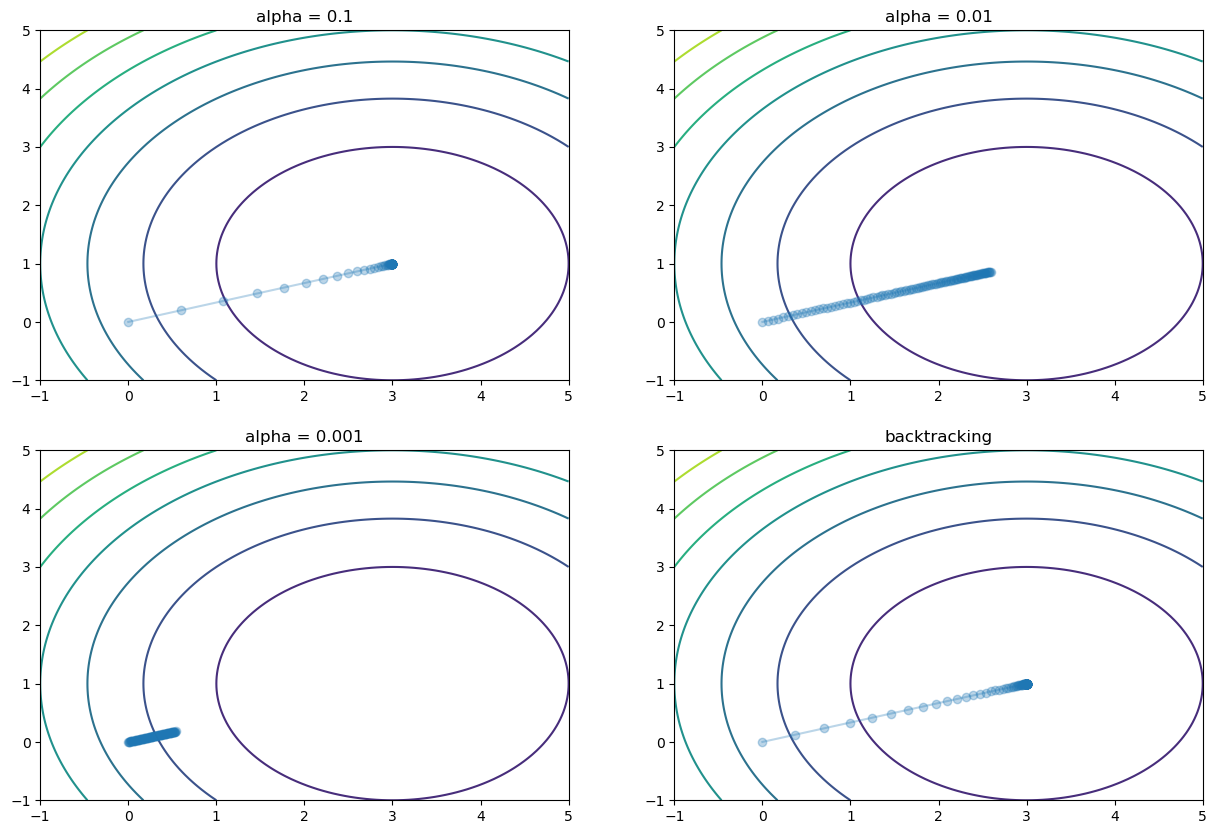

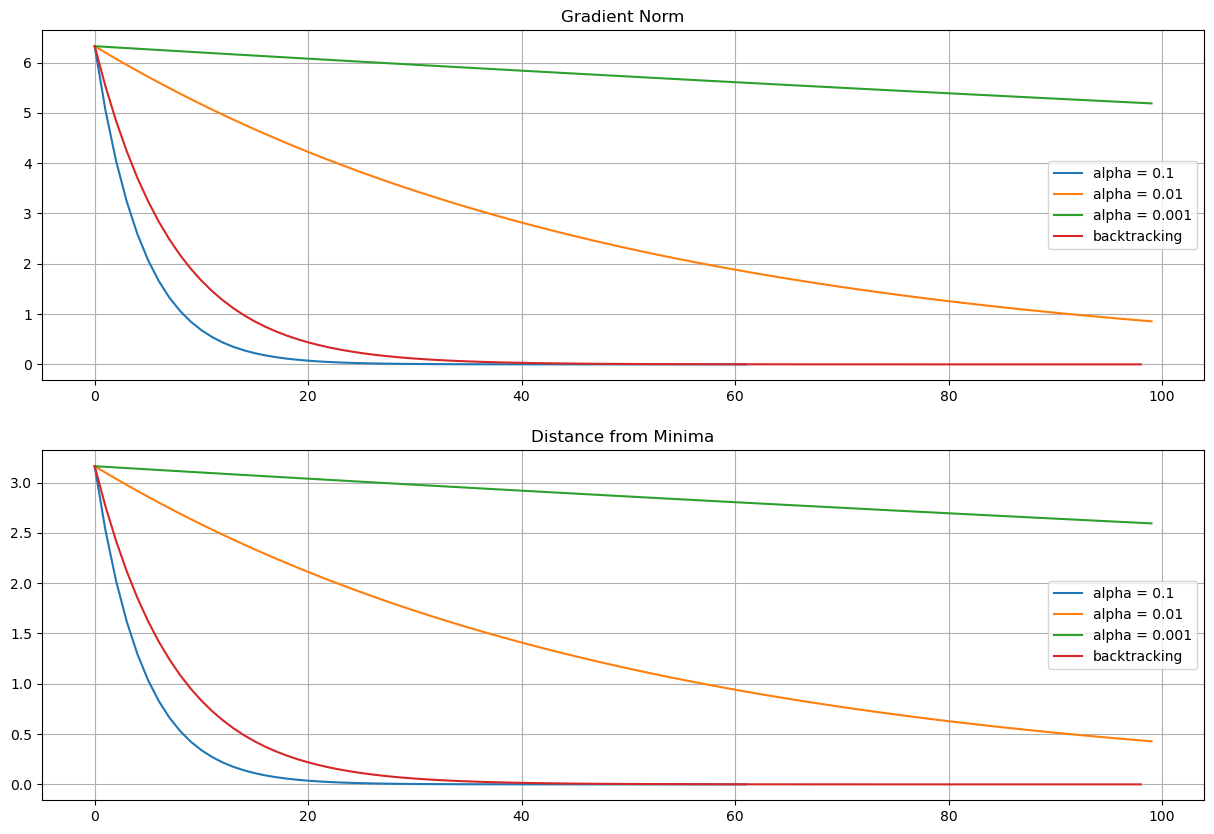

In [13]:
def f(x):
    return (x[0]-3)**2 + (x[1]-1)**2

def grad_f(x):
    return np.array([2*(x[0]-3), 2*(x[1]-1)])

# initializing the first step
n = 2
x0 = np.array([0,0])

# setting stop conditions
kmax = 100
tolf = 10**-6   
tolx = 10**-6

# different step size
alphas = [0.1, 0.01, 0.001]

fig, axes = plt.subplots(2,2, figsize = (15,10))
x_ax = np.linspace(-1,5,100)
y_ax = np.linspace(-1,5,100)
xv,yv = np.meshgrid(x_ax,y_ax)
z_ax = f([xv,yv])


fig_2, (axe1,axe2) = plt.subplots(2,1, figsize = (15,10))
legends  = []

for i, ax in enumerate(axes.flatten()):
    if i == 3:
        x, k, f_val, grads, err, stop_condition = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, back_tracked=True) 
        ax.set_title('backtracking')
        legends.append('backtracking')
        print(f'backtracking \tfinal result : {x[:,-1]}\t' + stop_condition)
    else:
        x, k, f_val, grads, err, stop_condition = gradient_descent(f, grad_f, x0, kmax, tolf, tolx, back_tracked=False, alpha=alphas[i])  
        ax.set_title(f'alpha = {alphas[i]}')
        legends.append(f'alpha = {alphas[i]}')
        print(f'alpha = {alphas[i]}\tfinal result : {x[:,-1]}\t' + stop_condition)
        
    # plotting the steps to goal
    contour = ax.contour(x_ax,y_ax,z_ax)
    ax.plot(x[0,:],x[1,:],'-o', alpha = 0.3)
    
    # plotting gradient norm for each iteration
    axe1.plot(err)
    
    # plotting error norm for each iteration
    x_true = np.repeat(np.array([[3,1]]), x.shape[1], axis = 0).T
    axe2.plot(np.linalg.norm((x_true - x), axis = 0))


axe1.set_title('Gradient Norm')
axe1.legend(legends)
axe1.grid()

axe2.set_title('Distance from Minima')
axe2.legend(legends)
axe2.grid()

plt.show()